In [ ]:
!pip install ktrain

In [ ]:
import os
import ktrain
from ktrain import vision as vis
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks,optimizers


In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_data = train.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

test_data = validation.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

Found 3164 images belonging to 11 classes.
Found 725 images belonging to 11 classes.


In [ ]:
model= vis.image_regression_model('pretrained_inception',
                                  train_data=train_data,
                                  val_data=test_data)

The normalization scheme has been changed for use with a pretrained_inception model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
87924736/87910968 [==============================] - 0s 0us/step
pretrained_inception model created.


In [ ]:
model.summary()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import keras.backend as K

def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss= 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['Precision','accuracy','Recall','AUC',f1_score])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(train_data )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(train_data.classes, y_pred))
print('Classification Report')
target_names = ['0', '1','2','3','4','5','6','7','8','9','10']
print(classification_report(train_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 48  20   7  10   1  17 160 173  90  15  11]
 [ 59  22   5  20   0  19 186 244  86  12  15]
 [ 11   2   0   2   0   6  29  37  15   5   7]
 [ 20   7   5  12   0   4  57  74  29   4   5]
 [  9   5   1   4   0   3  25  38  15   3   3]
 [ 14   5   2   7   0   7  33  45  17   2   5]
 [  4   3   0   1   0   3  15  29  11   2   1]
 [ 57  25   2  20   0  23 183 175  89   9  23]
 [ 21   9   0   5   0   3  27  31  16   3   2]
 [ 36  14   5  10   0  19 121 146  73   6  10]
 [  9   8   0   8   0   8  40  38  16   9   2]]
Classification Report
              precision    recall  f1-score   support

           0       0.17      0.09      0.11       552
           1       0.18      0.03      0.06       668
           2       0.00      0.00      0.00       114
           3       0.12      0.06      0.08       217
           4       0.00      0.00      0.00       106
           5       0.06      0.05      0.06       137
           6       0.02      0.22      0.03        69
          

In [ ]:
learner = ktrain.get_learner(model=model,
                             train_data=train_data,
                             val_data=test_data,
                             batch_size=64)

In [ ]:
learner.fit_onecycle(1e-4,20)

/usr/local/lib/python3.7/dist-packages/ktrain/core.py:996: UserWarning: cyclical momentum has been disabled because optimizer is not "Adam-like" with beta_1 param
  "cyclical momentum has been disabled because "




begin training using onecycle policy with max lr of 0.0001...
Epoch 1/20
50/50 [==============================] - 309s 6s/step - loss: 0.9491 - precision: 0.7517 - accuracy: 0.6612 - recall: 0.5386 - auc: 0.9544 - f1_score: 0.6269 - val_loss: 2.0243 - val_precision: 0.4754 - val_accuracy: 0.3862 - val_recall: 0.2800 - val_auc: 0.8142 - val_f1_score: 0.3523
Epoch 2/20
50/50 [==============================] - 297s 6s/step - loss: 0.9353 - precision: 0.7623 - accuracy: 0.6700 - recall: 0.5544 - auc: 0.9553 - f1_score: 0.6411 - val_loss: 2.0337 - val_precision: 0.4785 - val_accuracy: 0.4083 - val_recall: 0.2910 - val_auc: 0.8165 - val_f1_score: 0.3629
Epoch 3/20
50/50 [==============================] - 295s 6s/step - loss: 0.9213 - precision: 0.7707 - accuracy: 0.6716 - recall: 0.5525 - auc: 0.9570 - f1_score: 0.6437 - val_loss: 2.0725 - val_precision: 0.4624 - val_accuracy: 0.4000 - val_recall: 0.2883 - val_auc: 0.8114 - val_f1_score: 0.3590
Epoch 4/20
50/50 [===========================

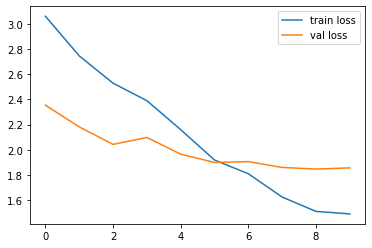

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(learner.history.history['loss'], label='train loss')
plt.plot(learner.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


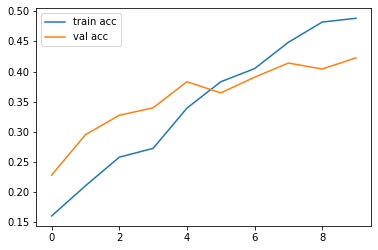

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(learner.history.history['accuracy'], label='train acc')
plt.plot(learner.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

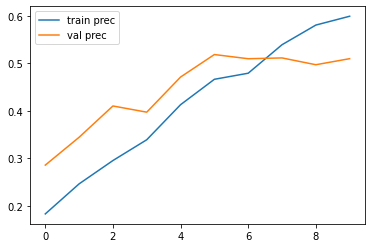

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the precision
plt.plot(learner.history.history['precision'], label='train prec')
plt.plot(learner.history.history['val_precision'], label='val prec')
plt.legend()
plt.show()
plt.savefig('AccVal_prec')


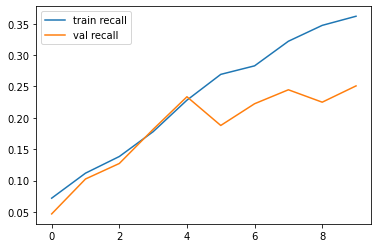

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot recall
plt.plot(learner.history.history['recall'], label='train recall')
plt.plot(learner.history.history['val_recall'], label='val recall')
plt.legend()
plt.show()
plt.savefig('AccVal_rec')

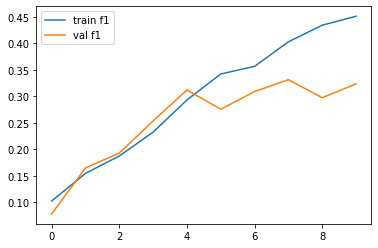

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot f1_score
plt.plot(learner.history.history['f1_score'], label='train f1')
plt.plot(learner.history.history['val_f1_score'], label='val f1')
plt.legend()
plt.show()
plt.savefig('AccVal_f1')

val [[1.0392581e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]
8


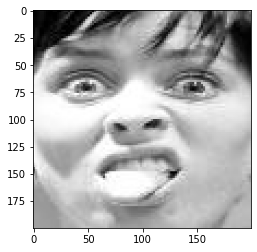

In [ ]:
img=image.load_img('/content/photo.jpg',target_size=(200,200))
plt.imshow(img)
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
print("val %s"%val)
rach=val.argmax()
if rach==0:
  print("Happily Surprised")
if rach==1:
  print("Happily Disgusted")
if rach==2:
  print(" Sadly Fearful")
if rach==3:
  print("Sadly Angry")
if rach==4:
  print(" Sadly Surprised")
if rach==5:
  print("Sadly Disgusted")
if rach==6:
  print(" Fearfully Angry")
if rach==7:
  print("Fearfully Surprised")
if rach==8:
  print("Angrily Surprised")
if rach==9:
  print("Angrily Disgusted")
if rach==10:
  print("Disgustedly Surprised")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))